In [2]:
import numpy as np
import pandas as pd
import re
import pymongo
from pymongo import MongoClient
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

client = MongoClient()

In [38]:
#connecting to the database
db = client.met_museum
# creating a dataframe from the met_collection
metcollect_df = pd.DataFrame(list(db.met_collection.find()))

In [39]:
metcollect_df.head()

,_id,artifact_detail,location,title
0,5740c389682f25029373f0e7,"{u'Date:': u'ca. 1150–60', u'Classification:':...",On view at The Met Cloisters in Gallery 14,The Cloisters Cross
1,5740c38e682f25029373f0e8,"{u'Dimensions:': u'15 7/8 × 5 1/8 × 4 1/4 in.,...",On view at The Met Fifth Avenue in Gallery 899,Bronze statuette of an artisan with silver eyes
2,5740c392682f25029373f0e9,"{u'Period:': u'New Kingdom', u'Dynasty:': u'Dy...",On view at The Met Fifth Avenue in Gallery 118,Ritual Statuette of Thutmose III
3,5740c396682f25029373f0ea,"{u' ': u'Attributed to the Amasis Painter', u'...",On view at The Met Fifth Avenue in Gallery 154,Terracotta lekythos (oil flask)
4,5740c399682f25029373f0eb,"{u'Dimensions:': u'L. 15 cm ', u'Date:': u'ca....",On view at The Met Fifth Avenue in Gallery 403,"Shaft-hole axe head with bird-headed demon, bo..."


In [40]:
print metcollect_df.iloc[0,1].keys()
print metcollect_df.iloc[1,1].keys()

[u'Date:', u'Classification:', u'Accession Number:', u'Culture:', u'Medium:', u'Credit Line:', u'Dimensions:']
[u'Dimensions:', u'Date:', u'Classification:', u'Accession Number:', u'Culture:', u'Medium:', u'Credit Line:', u'Period:']


In [42]:
# unpacking the nested list to columns
def unpack(df, column, fillna=None):
    ret = None
    if fillna is None:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems()))], axis=1)
        del ret[column]
    else:
        ret = pd.concat([df, pd.DataFrame((d for idx, d in df[column].iteritems())).fillna(fillna)], axis=1)
        del ret[column]
    return ret

metcollect_df = unpack(metcollect_df, 'artifact_detail', 0)
####deleting the unnecessary columns###
metcollect_df = metcollect_df.drop('_id', 1)
metcollect_df = metcollect_df.drop(' ', 1)
# setting the index to title column
metcollect_df = metcollect_df.set_index('title')
#### cleaning the column names ###
colnames = pd.Series(metcollect_df.columns)
for i in range(len(colnames)):
    colnames[i] = colnames[i].lower().encode('ascii','ignore')\
    .replace(':','')
metcollect_df.columns = colnames
metcollect_df

,location,accession number,armorer,artist,author,classification,classifications,credit line,culture,date,...,medium,object name,patron,period,printer,publisher,reign,retailer,rights and reproduction,swordsmith
title,,,,,,,,,,,,,,,,,,,,,
The Cloisters Cross,On view at The Met Cloisters in Gallery 14,63.12,0,0,0,Ivories,0,"The Cloisters Collection, 1963",British,ca. 1150–60,...,Walrus ivory,0,0,0,0,0,0,0,0,0
Bronze statuette of an artisan with silver eyes,On view at The Met Fifth Avenue in Gallery 899,1972.11.1,0,0,0,Bronzes,0,"Rogers Fund, 1972",Greek,ca. mid-1st century B.C.,...,"Bronze, silver",0,0,Late Hellenistic,0,0,0,0,0,0
Ritual Statuette of Thutmose III,On view at The Met Fifth Avenue in Gallery 118,1995.21,0,0,0,0,0,"Purchase, Edith Perry Chapman Fund and Malcolm...",0,ca. 1479–1425 B.C.,...,"Black bronze, gold inlay",0,0,New Kingdom,0,0,reign of Thutmose III,0,0,0
Terracotta lekythos (oil flask),On view at The Met Fifth Avenue in Gallery 154,56.11.1,0,0,0,Vases,0,"Purchase, Walter C. Baker Gift, 1956","Greek, Attic",ca. 550–530 B.C.,...,Terracotta; black-figure,0,0,Archaic,0,0,0,0,0,0
"Shaft-hole axe head with bird-headed demon, boar, and dragon",On view at The Met Fifth Avenue in Gallery 403,1982.5,0,0,0,Metalwork-Implements,0,"Purchase, Harris Brisbane Dick Fund, and James...",Bactria-Margiana Archaeological Complex,ca. late 3rd–early 2nd millennium B.C.,...,"Silver, gold foil",0,0,Bronze Age,0,0,0,0,0,0
Festival Robe,Not on view,54.14.2,0,0,0,Costumes-Embroidered,0,"Gift of Lewis Einstein, 1954",China,second half of the 18th century,...,Silk and gold-and-silver thread embroidery on ...,0,0,Qing dynasty (1644–1911),0,0,0,0,0,0
Kitab suwar al-kawakib al-thabita (Book of the Images of the Fixed Stars) of al-Sufi,On view at The Met Fifth Avenue in Gallery 453,13.160.10,0,0,"`Abd al-Rahman al-Sufi (Iranian, Rey 903–986 S...",Codices,0,"Rogers Fund, 1913",Islamic,late 15th century,...,Ink and gold on paper; leather binding\n,Illustrated manuscript,0,0,0,0,0,0,0,0
Dagger with Zoomorphic Hilt,Not on view,2011.236,0,0,0,Arms and Armor,0,"Purchase, Lila Acheson Wallace Gift, 2011",Islamic,second half 16th century,...,"Hilt: copper; cast, chased, gilded, and inlaid...",Dagger,0,0,0,0,0,0,0,0
Marble head of a goddess,On view at The Met Fifth Avenue in Gallery 153,10.142.1,0,0,0,Stone Sculpture,0,"Rogers Fund, 1910",Greek,4th century B.C.,...,Marble,0,0,Late Classical,0,0,0,0,0,0


In [43]:
# number of unique values and then finding the counts
print len(metcollect_df['culture'].unique())
print len(metcollect_df['geography'].unique())
metcollect_df['date'].value_counts()
metcollect_df['medium'].value_counts()

34
39


Oil on canvas                                                                                                                                                                                     8
0                                                                                                                                                                                                 3
Marble                                                                                                                                                                                            2
Bronze                                                                                                                                                                                            2
cotton                                                                                                                                                                                            2
Terracotta          

In [ ]:
# what can I graph?
# medium, geography
# culture, classification, date, location

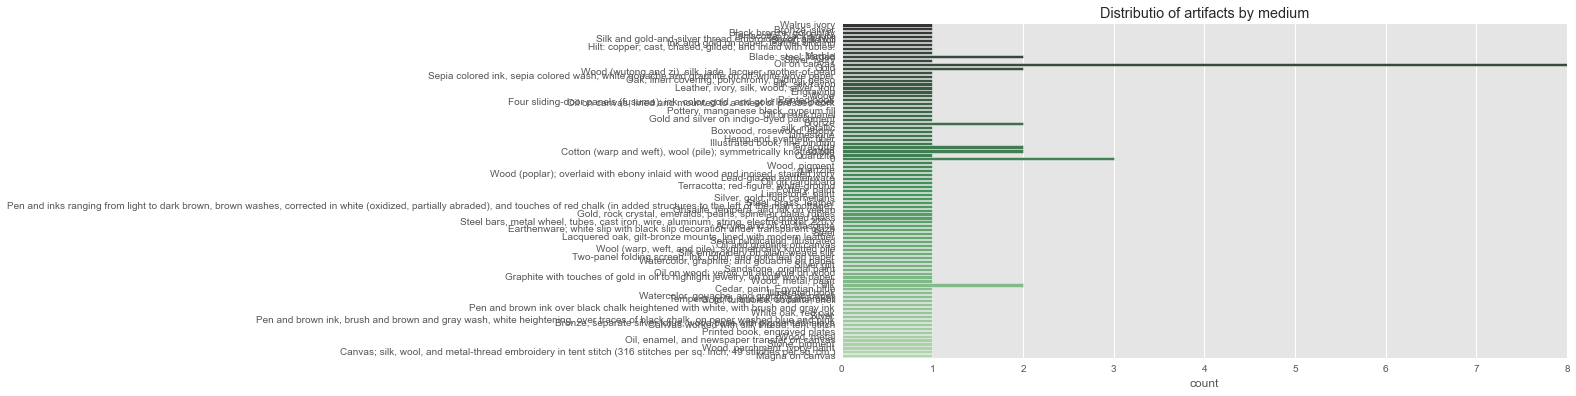

In [16]:
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(y='medium', data = metcollect_df, palette = 'Greens_d')
plt.title('Distributio of artifacts by medium')
plt.ylabel('')

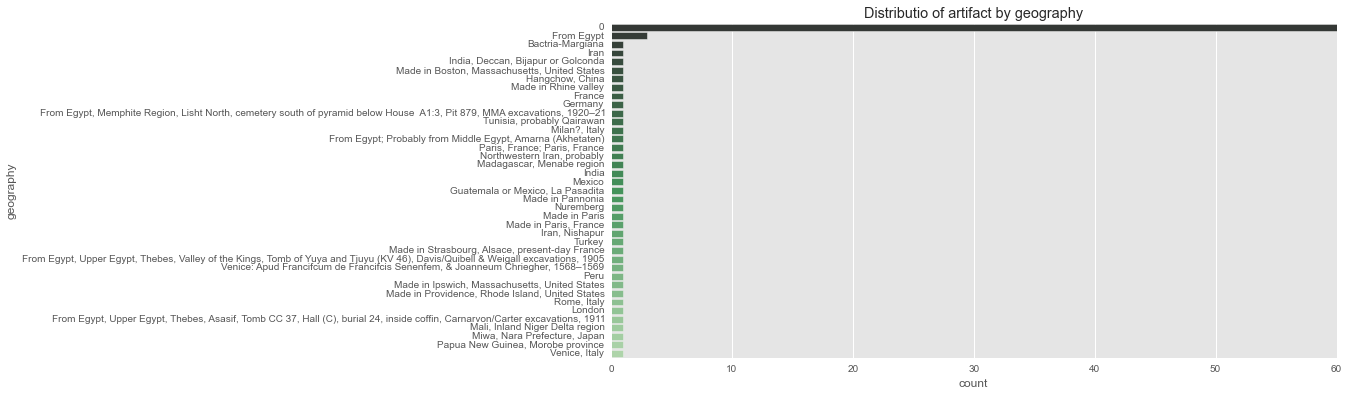

In [17]:
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(y='geography', data = metcollect_df, palette = 'Greens_d')
plt.title('Distributio of artifact by geography')
# plt.savefig('geography_unique')

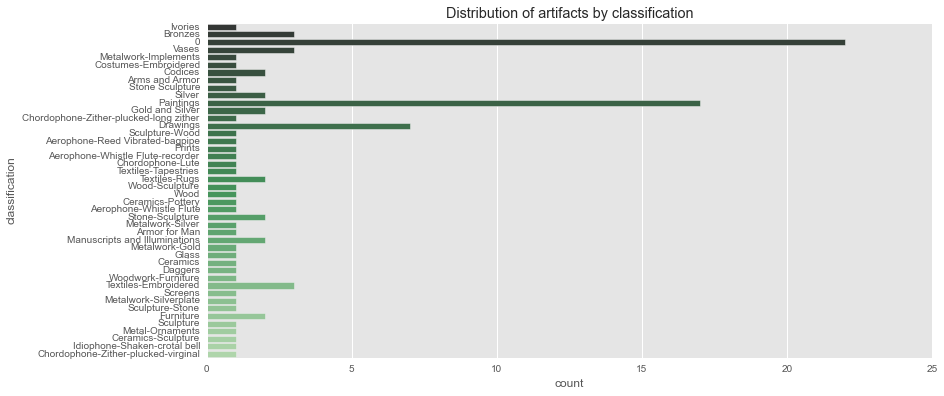

In [314]:
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(y='classification', data = metcollect_df, palette = 'Greens_d')
plt.title('Distribution of artifacts by classification')
# plt.savefig('classification_unique')

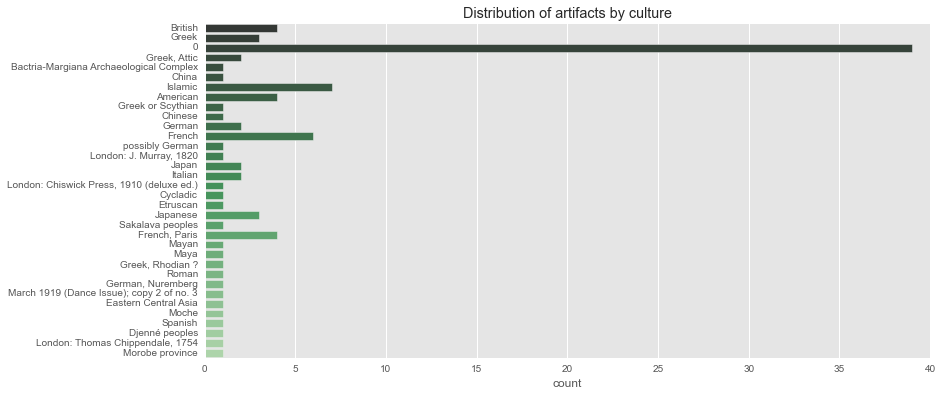

In [318]:
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(y='culture', data = metcollect_df, palette = 'Greens_d')
plt.title('Distribution of artifacts by culture')
plt.ylabel('')
# plt.savefig('culture_unique')

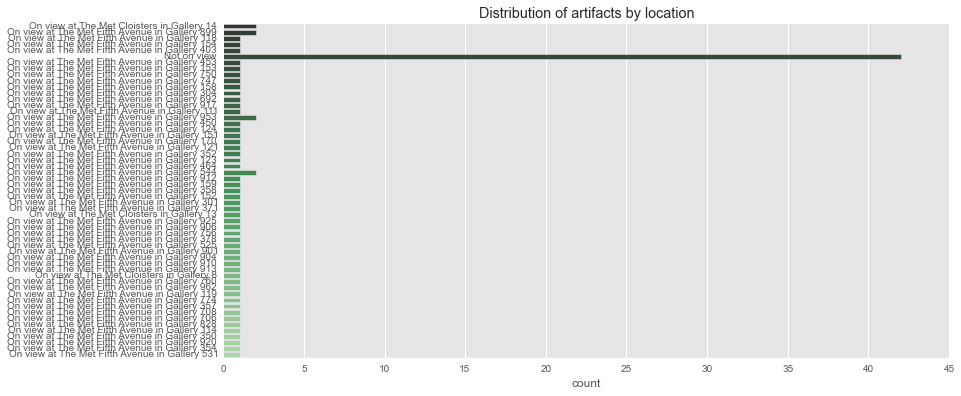

In [19]:
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(y='location', data = metcollect_df, palette='Greens_d')
plt.axes().set_title('Distribution of artifacts by location')
plt.ylabel('')

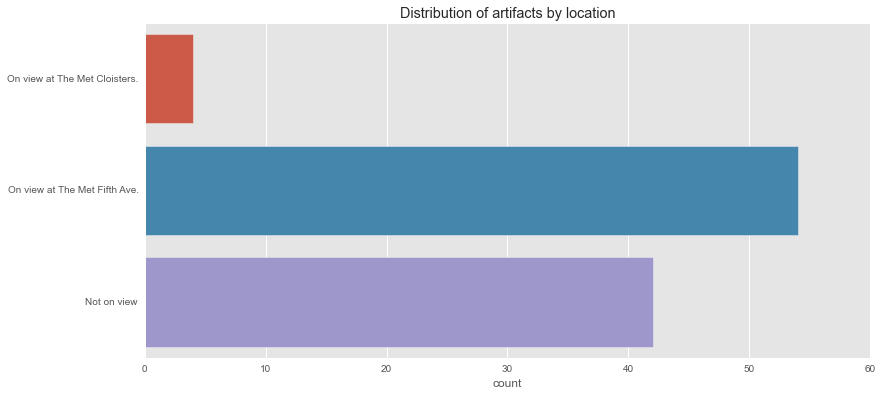

In [305]:
# cleaning location to graph
metcollect_df.location = metcollect_df.location.str.replace('On view at The Met Fifth.*' , 'On view at The Met Fifth Ave.')
metcollect_df.location = metcollect_df.location.str.replace('On view at The Met Cloister.*' , 'On view at The Met Cloisters.')
# graphing
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(y='location', data = metcollect_df)
plt.axes().set_title('Distribution of artifacts by location')
plt.ylabel('')
# plt.savefig('location.png')

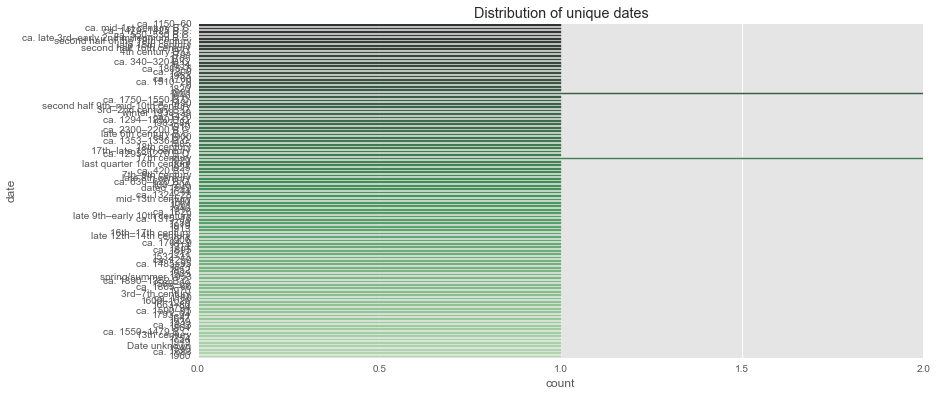

In [13]:
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(y='date', data = metcollect_df, palette = 'Greens_d')
plt.title('Distribution of unique dates')
# plt.savefig('date_unique.png')

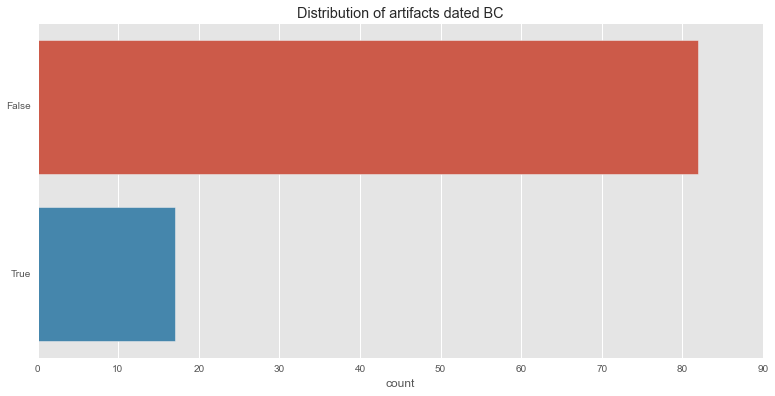

In [307]:
# deciphering if artwork is BC or AD and adding a boolean column
metcollect_df['BC'] = metcollect_df.date.str.contains('B.C')
# graphing
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(y='BC', data = metcollect_df)
plt.axes().set_title('Distribution of artifacts dated BC')
plt.ylabel('')
plt.savefig('BC_plot.png')

In [297]:
metcollect_df.classification.unique()
# woodwork, sculpture, metalwork, paintings, instruments, textiles, glass

array([u'Ivories', u'Bronzes', 0, u'Vases', u'Metalwork-Implements',
       u'Costumes-Embroidered', u'Codices', u'Arms and Armor',
       u'Stone Sculpture', u'Silver', u'Paintings', u'Gold and Silver',
       u'Chordophone-Zither-plucked-long zither', u'Drawings',
       u'Sculpture-Wood', u'Aerophone-Reed Vibrated-bagpipe', u'Prints',
       u'Aerophone-Whistle Flute-recorder', u'Chordophone-Lute',
       u'Textiles-Tapestries', u'Textiles-Rugs', u'Wood-Sculpture',
       u'Wood', u'Ceramics-Pottery', u'Aerophone-Whistle Flute',
       u'Stone-Sculpture', u'Metalwork-Silver', u'Armor for Man',
       u'Manuscripts and Illuminations', u'Metalwork-Gold', u'Glass',
       u'Ceramics', u'Daggers', u'Woodwork-Furniture',
       u'Textiles-Embroidered', u'Screens', u'Metalwork-Silverplate',
       u'Sculpture-Stone', u'Furniture', u'Sculpture', u'Metal-Ornaments',
       u'Ceramics-Sculpture', u'Idiophone-Shaken-crotal bell',
       u'Chordophone-Zither-plucked-virginal'], dtype=object)

In [319]:
metcollect_df.culture.unique()

array([u'British', u'Greek', 0, u'Greek, Attic',
       u'Bactria-Margiana Archaeological Complex', u'China', u'Islamic',
       u'American', u'Greek or Scythian', u'Chinese', u'German', u'French',
       u'possibly German', u'London: J. Murray, 1820', u'Japan',
       u'Italian', u'London: Chiswick Press, 1910 (deluxe ed.)',
       u'Cycladic', u'Etruscan', u'Japanese', u'Sakalava peoples',
       u'French, Paris', u'Mayan', u'Maya', u'Greek, Rhodian ?', u'Roman',
       u'German, Nuremberg', u'March 1919 (Dance Issue); copy 2 of no. 3',
       u'Eastern Central Asia', u'Moche', u'Spanish', u'Djenn\xe9 peoples',
       u'London: Thomas Chippendale, 1754', u'Morobe province'], dtype=object)